In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing


In [4]:
tf.__version__

'2.11.0'

# Classification Part

In [5]:
fmnist_data = keras.datasets.fashion_mnist

In [7]:
fmnist_data.load_data()

4422102/4422102 [==============================] - 265s 60us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [46]:
(x_train, y_train),  (x_test, y_test) = fmnist_data.load_data()

In [9]:
.shape

(60000, 28, 28)

In [10]:
x_test.shape

(10000, 28, 28)

In [11]:
y_train.shape

(60000,)

In [12]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [16]:
x_train[4,4,:]

array([  0,   0,   0,   0,   0,   0,   0,   0, 139, 229, 212, 226, 255,
         0, 162, 255, 213, 226, 200,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

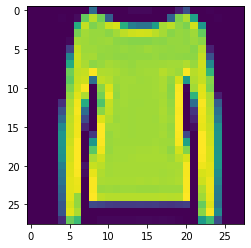

In [47]:
plt.imshow(x_train[135,])

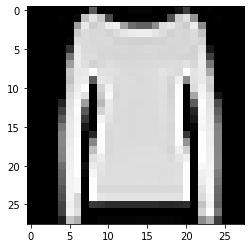

In [24]:
plt.imshow(x_train[135,], cmap="gray")

In [48]:
x_train, x_test = x_train/255.0, x_test/255.0

In [26]:
x_train.shape

(60000, 28, 28)

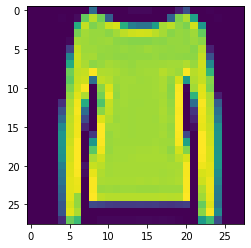

In [29]:
plt.imshow(x_train[135,])

In [49]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(75, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 75)                7575      
                                                                 
 dense_5 (Dense)             (None, 10)                760       
                                                                 
Total params: 86,835
Trainable params: 86,835
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.layers

In [52]:
weights, bias = model.layers[1].get_weights()

In [53]:
weights

array([[-0.07398524, -0.05104772,  0.07740512, ..., -0.04886938,
         0.07528587,  0.01570514],
       [-0.05251597, -0.05512514, -0.03630273, ..., -0.05263425,
         0.05608226, -0.05717615],
       [ 0.05980089,  0.03994358,  0.04184302, ..., -0.00546607,
        -0.00609817, -0.06283039],
       ...,
       [-0.05155405, -0.07224925, -0.07391544, ..., -0.04380983,
         0.01395213,  0.08087397],
       [ 0.0223943 , -0.03341046,  0.08020099, ...,  0.04228081,
         0.04609923, -0.04467069],
       [-0.01741228, -0.03933784, -0.02714482, ...,  0.06725761,
         0.07905495,  0.08103639]], dtype=float32)

In [54]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [55]:
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics = ["accuracy"])

In [56]:
start = model.fit(x_train, y_train, epochs = 70, validation_split = 0.2)

Epoch 1/70
1500/1500 [==============================] - 6s 4ms/step - loss: 0.8077 - accuracy: 0.7320 - val_loss: 0.5504 - val_accuracy: 0.8116
Epoch 2/70
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5110 - accuracy: 0.8241 - val_loss: 0.4720 - val_accuracy: 0.8360
Epoch 3/70
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4619 - accuracy: 0.8383 - val_loss: 0.4505 - val_accuracy: 0.8421
Epoch 4/70
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4343 - accuracy: 0.8483 - val_loss: 0.4321 - val_accuracy: 0.8484
Epoch 5/70
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4136 - accuracy: 0.8565 - val_loss: 0.4134 - val_accuracy: 0.8547
Epoch 6/70
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3976 - accuracy: 0.8615 - val_loss: 0.4141 - val_accuracy: 0.8567
Epoch 7/70
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3842 - accuracy: 0.8653 - val_loss: 0.3961 - val_accuracy:

In [58]:
print(start.history)

{'loss': [0.8077449798583984, 0.5110448002815247, 0.46192434430122375, 0.43427225947380066, 0.4135626256465912, 0.3975539207458496, 0.38422518968582153, 0.3724590539932251, 0.3626377284526825, 0.35325944423675537, 0.34532132744789124, 0.3378537595272064, 0.3314475417137146, 0.32420265674591064, 0.31877756118774414, 0.3134984076023102, 0.30673032999038696, 0.30179986357688904, 0.29781973361968994, 0.29283589124679565, 0.2874141335487366, 0.28462162613868713, 0.2795482873916626, 0.2757067382335663, 0.2719002366065979, 0.26838773488998413, 0.2665799558162689, 0.2607421875, 0.2586854100227356, 0.2539990544319153, 0.2522682249546051, 0.24903222918510437, 0.24455568194389343, 0.2422347068786621, 0.23919256031513214, 0.23599651455879211, 0.23306933045387268, 0.2302313894033432, 0.22641007602214813, 0.22454409301280975, 0.2228294014930725, 0.21949318051338196, 0.21708862483501434, 0.2145535945892334, 0.21158748865127563, 0.2088562548160553, 0.20652861893177032, 0.20399053394794464, 0.202347651

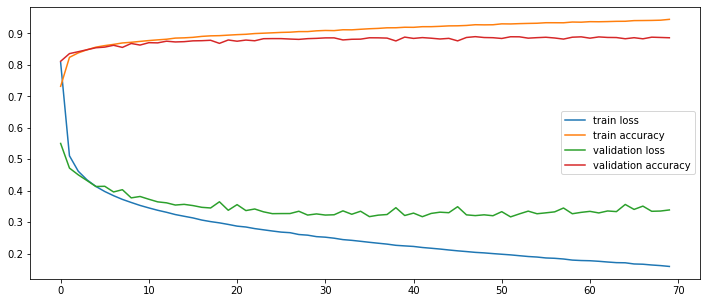

In [59]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(start.history["loss"], label="train loss")
ax.plot(start.history["accuracy"], label="train accuracy")
ax.plot(start.history["val_loss"], label="validation loss")
ax.plot(start.history["val_accuracy"], label="validation accuracy")
ax.legend()

In [63]:
model.evaluate(x_test, y_test, verbose=0)

[0.3570200800895691, 0.8826000094413757]

In [64]:
x1 = x_test[4:8]

In [65]:
x1.shape

(4, 28, 28)

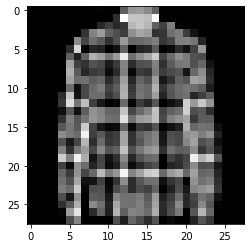

In [73]:
plt.imshow(x1[3], cmap = "gray")

In [75]:
model.predict(x1).round(2)

1/1 [==============================] - 0s 32ms/step


array([[0.4 , 0.  , 0.01, 0.  , 0.  , 0.  , 0.59, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [77]:
model.predict(x1).shape

1/1 [==============================] - 0s 30ms/step


(4, 10)

In [81]:
np.argmax(model.predict(x1).round(2), axis=1)

1/1 [==============================] - 0s 26ms/step


array([6, 1, 4, 6], dtype=int64)

In [82]:
y_test[4:8]

array([6, 1, 4, 6], dtype=uint8)